**Assess the risk of purchasing 1,000 GOOGL shares and holding them for one month**

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

**Setting up stock parameters**

In [3]:
# number of shares
shares_GOOGL=1000

# live stock price
price=yf.Ticker("GOOGL")
price.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-08-24,113.500000,114.779999,112.870003,113.690002,17734600,0,0
2022-08-25,114.239998,116.720001,114.110001,116.650002,16956800,0,0
2022-08-26,114.720001,115.120003,110.190002,110.339996,37245700,0,0
2022-08-29,109.989998,110.949997,108.800003,109.419998,21191200,0,0
2022-08-30,110.169998,110.500000,107.800003,108.940002,27513300,0,0
2022-08-31,110.650002,110.849998,108.129997,108.220001,28627000,0,0
2022-09-01,108.279999,110.449997,107.360001,109.739998,28360900,0,0
2022-09-02,110.589996,110.739998,107.260002,107.849998,24142000,0,0
2022-09-06,107.300003,108.029999,105.779999,106.809998,25068300,0,0


In [10]:
# ending close stock price
price_GOOGL=(price.history().tail(1)["Close"].iloc[0])
price_GOOGL

98.73999786376953

In [11]:
# Investment value
value_GOOGL= price_GOOGL * shares_GOOGL

# Risk free rate (4 week Treasury Bill Rate, 2.65%)
RFR_GOOGL=0.0265

# Volatility (30-day historical volatility for GOOGL as at this time)
vol_GOOGL=0.3512

**Simulations-Calculating Investment returns**

In [12]:
# Number of Simulations
simulations=50000
# Simulate the return for holding the Investment for one month(21 trading days in month/ total in a year)
t_GOOGL=21/252

(array([  1.,   0.,   0.,   0.,   1.,   0.,   0.,   3.,   0.,   0.,   1.,
          0.,   0.,   3.,   2.,   2.,   3.,   6.,   8.,   6.,   8.,   9.,
          7.,  11.,  10.,  20.,  29.,  31.,  42.,  39.,  39.,  36.,  37.,
         46.,  55.,  63.,  59.,  81.,  69.,  59.,  97.,  90., 115., 123.,
         88., 112., 133., 131., 125., 148., 154., 138., 148., 155., 140.,
        146., 137., 148., 151., 135., 134., 114., 118., 118., 113., 116.,
         94.,  76.,  77.,  84.,  55.,  61.,  55.,  47.,  49.,  33.,  36.,
         35.,  19.,  25.,  28.,   9.,  21.,  14.,  12.,  15.,   5.,   7.,
          7.,   4.,   8.,   3.,   2.,   2.,   0.,   0.,   0.,   2.,   0.,
          2.]),
 array([-3.87948834, -3.80717411, -3.73485988, -3.66254565, -3.59023142,
        -3.5179172 , -3.44560297, -3.37328874, -3.30097451, -3.22866028,
        -3.15634605, -3.08403182, -3.01171759, -2.93940337, -2.86708914,
        -2.79477491, -2.72246068, -2.65014645, -2.57783222, -2.50551799,
        -2.43320376, -2.36

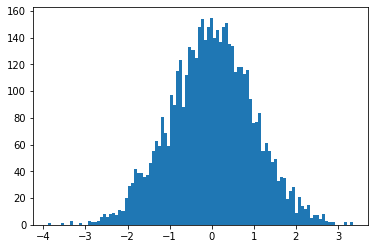

In [13]:
# Generate 5000 samples from a standard normal distribution, mean=0, sd=1
sample=np.random.standard_normal(5000)

# Visuzalize the distibution of the sample
plt.hist(sample,bins=100)

In [14]:
# mean and standard deviation of the sample array
print (np.mean(sample))
print (np.std(sample))

-0.0027727406278528965
0.9906613155760593


In [15]:
# Create a function to calculate the returns of the investment in 50000 scenarios
def VaR(pv,RFR,vol,t,simulations):
    end_value=pv*np.exp((RFR - 0.5 * vol ** 2) * t + np.random.standard_normal(
        simulations) * vol * np.sqrt(t))
    returns = end_value - pv
    return returns

# Apply the VaR function using the parameters to simulate the returns
returns_GOOGL = VaR(value_GOOGL,RFR_GOOGL,vol_GOOGL,t_GOOGL,simulations)

**Identify VaR at 90%, 95% and 99% confidence level**

In [16]:
# print: VaR at X% confidence levelP: $y
x= 0.9
y= 3455.248
print("VaR at {:.0%} confidence level: ${:,.0f}".format(x,y))

VaR at 90% confidence level: $3,455


VaR at 90% confidence level: $-12,468
VaR at 95% confidence level: $-15,599
VaR at 99% confidence level: $-20,813


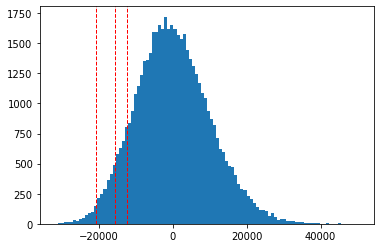

In [20]:
# Plot the distribution of returns
plt.hist(returns_GOOGL,bins=100)

# Show VaR at 90%, 95%, 99% confidence level
percentiles = [10,5,1]

for i in percentiles:
    confidence = (100-i)/100
    value = np.percentile(returns_GOOGL,i)
    print("VaR at {:.0%} confidence level: ${:,.0f}".format(confidence,value))
    plt.axvline(value,color = "red",linestyle="dashed",linewidth=1)